In [1]:
# data manipulation
import pandas as pd

# viz and stats
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# nlp
import re
import unicodedata
import nltk
import nltk.sentiment
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

#split
from sklearn.model_selection import train_test_split

# local imports
import acquire as a
import prepare as p

In [2]:
df = a.get_readmes()
df = p.prep_readmes(df)
df_backup = df

# Explore

In [3]:
df = df_backup

In [4]:
df

,repo,language,readme_contents,clean,lemmatized,top3other
0,Hardtack/HTProgressHUD,Objective-C,# HTProgressHUD\n\n[![No Maintenance Intended]...,htprogresshud maintenance intended http unmain...,htprogresshud maintenance intended http unmain...,Objective-C
1,raycmorgan/Mu,JavaScript,"# Mu - a fast, streaming Node.js Mustache engi...",mu fast streaming node js mustache engine warn...,mu fast streaming node j mustache engine warni...,JavaScript
2,rgeo/rgeo,Ruby,## RGeo\n\n[![Gem Version](https://badge.fury....,rgeo gem version https badge fury io rb rgeo s...,rgeo gem version http badge fury io rb rgeo sv...,other
3,johnlui/AutoLayout,Swift,# Auto Layout 秘境\n\n### 1.《Auto Layout 使用心得》系列...,auto layout auto layout fir im keynote auto la...,auto layout auto layout fir im keynote auto la...,other
4,evnaz/ENSwiftSideMenu,Swift,# ENSwiftSideMenu\n\nA lightweight flyover sid...,enswiftsidemenu lightweight flyover side menu ...,enswiftsidemenu lightweight flyover side menu ...,other
...,...,...,...,...,...,...
539,RealHacker/leetcode-solutions,Python,# leetcode-solutions\nRepo for all leetcode pr...,leetcode solutions repo leetcode problems solv...,leetcode solution repo leetcode problem solved...,other
540,Patrick-Kladek/CocoaDebugKit,Objective-C,CocoaDebugKit\n============\n[![Twitter: @Patr...,cocoadebugkit twitter patrickkladek https img ...,cocoadebugkit twitter patrickkladek http img s...,Objective-C
541,gophercon/2016-talks,JavaScript,Slides for GopherCon 2016 regular program and ...,slides gophercon regular program lightning tal...,slide gophercon regular program lightning talk...,JavaScript
542,dinocore1/DevsmartLib-Android,Java,\n\nThe MIT License\n\nCopyright (c) 2011 Paul...,mit license copyright c paul soucy pauldev sma...,mit license copyright c paul soucy pauldev sma...,Java


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 544 entries, 0 to 543
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   repo             544 non-null    object
 1   language         544 non-null    object
 2   readme_contents  544 non-null    object
 3   clean            544 non-null    object
 4   lemmatized       544 non-null    object
 5   top3other        544 non-null    object
dtypes: object(6)
memory usage: 25.6+ KB


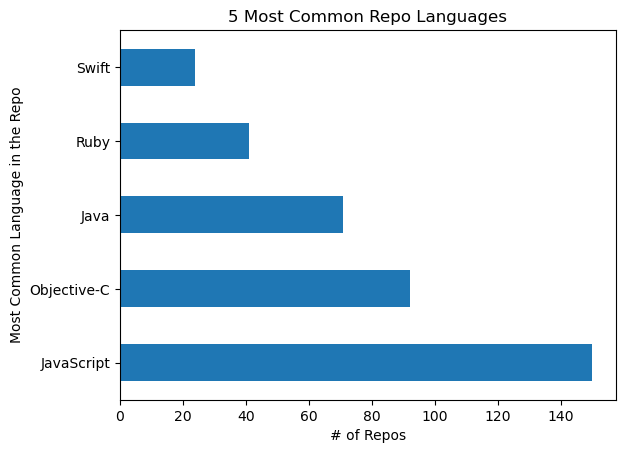

In [6]:
df.language.value_counts().head(5).plot(kind='barh',title='5 Most Common Repo Languages',xlabel='# of Repos',ylabel='Most Common Language in the Repo');

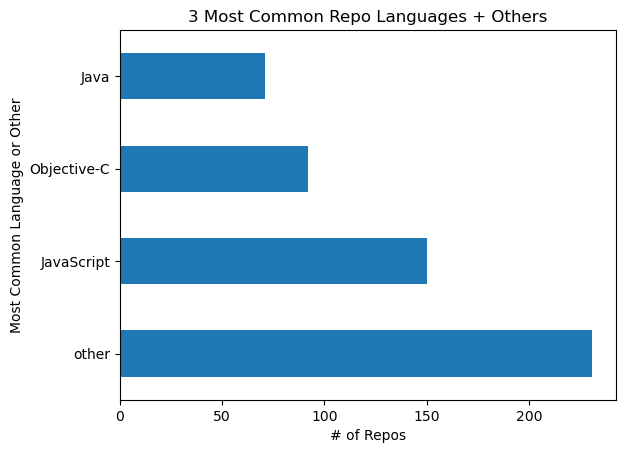

In [7]:
df.top3other.value_counts().plot(kind='barh',title='3 Most Common Repo Languages + Others',xlabel='# of Repos',ylabel='Most Common Language or Other');

In [8]:
df.head()

,repo,language,readme_contents,clean,lemmatized,top3other
0,Hardtack/HTProgressHUD,Objective-C,# HTProgressHUD\n\n[![No Maintenance Intended]...,htprogresshud maintenance intended http unmain...,htprogresshud maintenance intended http unmain...,Objective-C
1,raycmorgan/Mu,JavaScript,"# Mu - a fast, streaming Node.js Mustache engi...",mu fast streaming node js mustache engine warn...,mu fast streaming node j mustache engine warni...,JavaScript
2,rgeo/rgeo,Ruby,## RGeo\n\n[![Gem Version](https://badge.fury....,rgeo gem version https badge fury io rb rgeo s...,rgeo gem version http badge fury io rb rgeo sv...,other
3,johnlui/AutoLayout,Swift,# Auto Layout 秘境\n\n### 1.《Auto Layout 使用心得》系列...,auto layout auto layout fir im keynote auto la...,auto layout auto layout fir im keynote auto la...,other
4,evnaz/ENSwiftSideMenu,Swift,# ENSwiftSideMenu\n\nA lightweight flyover sid...,enswiftsidemenu lightweight flyover side menu ...,enswiftsidemenu lightweight flyover side menu ...,other


In [9]:
# df['top3other'] = np.where(df.language == 'JavaScript','JavaScript','other')
# df['top3other'] = np.where(df.language == 'Objective-C','Objective-C',df['top3other'])
# df['top3other'] = np.where(df.language == 'Java','Java',df['top3other'])
# df.head()

In [10]:
# def split_data(df, strat, seed=42, test=.2, validate=.25):
#     st = [strat]
#     train_validate, test = train_test_split(df, test_size=test, random_state=seed, stratify=df[st])
#     train, validate = train_test_split(train_validate, 
#                                         test_size=validate, 
#                                         random_state=seed, 
#                                         stratify=train_validate[st])
#     return train, validate, test

In [11]:
train, val, test = p.split_data(df,'top3other')
train.shape,val.shape,test.shape

((326, 6), (109, 6), (109, 6))

In [12]:
train.top3other.value_counts(normalize=True)

other          0.423313
JavaScript     0.276074
Objective-C    0.168712
Java           0.131902
Name: top3other, dtype: float64

In [13]:
val.top3other.value_counts(normalize=True)

other          0.431193
JavaScript     0.275229
Objective-C    0.165138
Java           0.128440
Name: top3other, dtype: float64

In [14]:
test.top3other.value_counts(normalize=True)

other          0.422018
JavaScript     0.275229
Objective-C    0.174312
Java           0.128440
Name: top3other, dtype: float64

## What are the most common words in READMEs?

In [15]:
all_words = [word for row in df['lemmatized'] for word in row.split()]
len(all_words)

299471

In [16]:
all_freq = pd.Series(all_words).value_counts()
all_freq.head(20)

http       8045
com        6204
github     3831
use        1774
io         1425
j          1413
file       1287
org        1217
code       1135
license    1060
example    1051
www        1019
img         978
master      974
project     939
install     932
using       930
image       928
default     897
name        867
dtype: int64

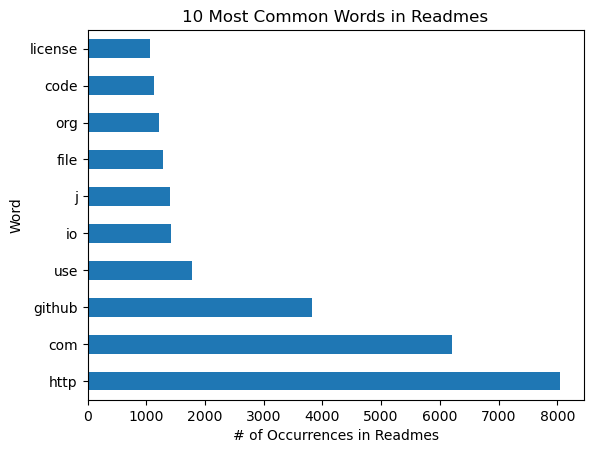

In [17]:
all_freq.head(10).plot(kind='barh',title='10 Most Common Words in Readmes',xlabel='# of Occurrences in Readmes',ylabel='Word');

## Does the length of the README vary by programming language?

In [21]:
# looking at lemmatized column to stay consistent
# create column based on length of lemmatized readme
train = train.assign(length = train['lemmatized'].str.len())
train

,repo,language,readme_contents,clean,lemmatized,top3other,length
407,hagsteel/swampdragon,JavaScript,# SwampDragon\n\n# Looking for someone to take...,swampdragon looking someone take longer time s...,swampdragon looking someone take longer time s...,JavaScript,3294
414,doczjs/docz,TypeScript,"<p align=""left"">\n <a href=""https://www.npmjs...",p alignleft hrefhttps www npmjs com package do...,p alignleft hrefhttps www npmjs com package do...,other,5496
109,autresphere/ASMediaFocusManager,Objective-C,## ASMediaFocusManager\nASMediaFocusManager gi...,asmediafocusmanager asmediafocusmanager gives ...,asmediafocusmanager asmediafocusmanager give a...,Objective-C,6448
238,cmaddux/littlebox,CSS,"# littlebox\nSuper simple to use, CSS-only ico...",littlebox super simple use css icons littlebox...,littlebox super simple use cs icon littlebox h...,other,1193
318,sstephenson/stitch,CoffeeScript,"<img src=""https://github.com/downloads/sstephe...",img srchttps github com downloads sstephenson ...,img srchttps github com downloads sstephenson ...,other,678
...,...,...,...,...,...,...,...
236,wellyshen/use-web-animations,TypeScript,# <em><b>USE-WEB-ANIMATIONS</b></em>\n\nUsing ...,embuse web animations b em using web animation...,embuse web animation b em using web animation ...,other,15770
372,divan/gobenchui,Go,\n# GoBenchUI\n\n[![Build Status](https://dron...,gobenchui build status https drone io github c...,gobenchui build status http drone io github co...,other,2940
265,maoruibin/GankDaily,Java,# GankDaily\n![icon](/app/src/main/res/mipmap-...,gankdaily icon app src main res mipmap xxxhdpi...,gankdaily icon app src main re mipmap xxxhdpi ...,Java,1617
245,omniscientjs/omniscient,JavaScript,![Omniscient Logo](./omniscient-logo.png)\n\n[...,omniscient logo omniscient logo png npm versio...,omniscient logo omniscient logo png npm versio...,JavaScript,10958


In [45]:
train.groupby('top3other').length.mean()

top3other
Java           3350.209302
JavaScript     4707.155556
Objective-C    3747.290909
other          4270.210145
Name: length, dtype: float64

In [66]:
train.groupby('top3other').length.median()

top3other
Java           1830.0
JavaScript     2951.0
Objective-C    2155.0
other          2588.0
Name: length, dtype: float64

In [67]:
train.length.median()

2382.0

In [51]:
train[train.length<50000].groupby('top3other').length.mean()

top3other
Java           2130.071429
JavaScript     4707.155556
Objective-C    3747.290909
other          4270.210145
Name: length, dtype: float64

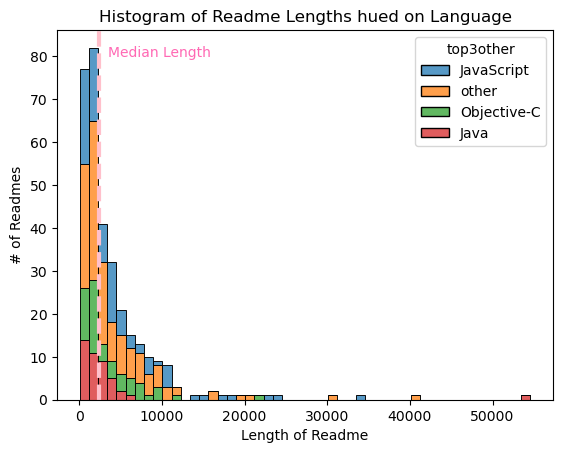

In [109]:
sns.histplot(data=train,x='length',hue='top3other',multiple='stack')
plt.axvline(train.length.median(),color='pink',linestyle='--',linewidth=3)
plt.text(x=3500,y=80,s='Median Length',color='hotpink')
plt.xlabel('Length of Readme')
plt.ylabel('# of Readmes')
plt.title('Histogram of Readme Lengths hued on Language')
plt.show()

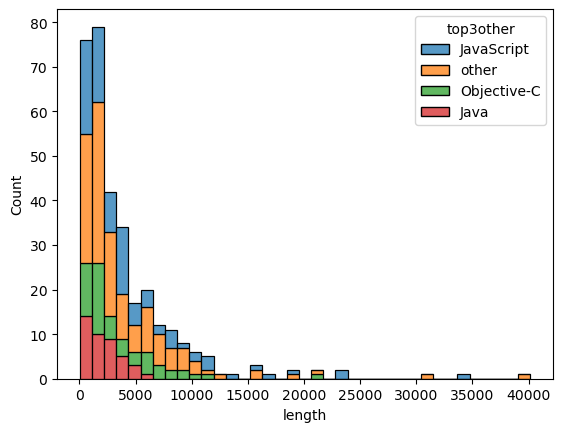

In [52]:
sns.histplot(data=train[train.length<50000],x='length',hue='top3other',multiple='stack')
plt.show()

In [32]:
# null hyp is normal dist, alt hyp not norm
# reject null; not normal dist
stats.shapiro(train.length)

ShapiroResult(statistic=0.5975901484489441, pvalue=7.490775866573869e-27)

In [35]:
# null hyp is normal dist, alt hyp not norm
# reject null; not normal dist
stats.anderson(train.length,'norm')

AndersonResult(statistic=31.610698561307004, critical_values=array([0.569, 0.648, 0.778, 0.907, 1.079]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=4181.266871165644, scale=5685.578791666943)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')

In [62]:
def wilcox(train, cat_var, cat_value, quant_var, alt_hyp='two-sided'):
    x = train[train[cat_var]==cat_value][quant_var]
    y = train[quant_var].median()
    w = (x-y)
    # alt_hyp = ‘two-sided’, ‘less’, ‘greater’
    stat,p = stats.wilcoxon(w, alternative=alt_hyp)
    print("Wilcoxon Test:\n", f'stat = {stat}, p = {p}')

def nova4(s1,s2,s3,s4):
    '''ANOVA test for 4 samples'''
    stat,p = stats.kruskal(s1,s2,s3,s4)
    print("Kruskal-Wallis H-Test:\n", f'stat = {stat}, p = {p}')

In [63]:
# null hyp Javascript readme lengths are about the same as the population median readme lengths
wilcox(train,'top3other','JavaScript','length')
# stats.wilcoxon(train[train.top3other=='JavaScript'].length - train.length.median())

Wilcoxon Test:
 stat = 1327.0, p = 0.0037427048598427737


In [65]:
# Objective-C and Java readme lengths are NOT significantly different than the population median readme length
# JavaScript and other language readme lengths are significantly different than the population median readme length
# alpha = .05
for lang in train.top3other.unique():
    print('|--------------------------------------|')
    print(lang)
    wilcox(train,'top3other',lang,'length')

|--------------------------------------|
JavaScript
Wilcoxon Test:
 stat = 1327.0, p = 0.0037427048598427737
|--------------------------------------|
other
Wilcoxon Test:
 stat = 3518.5, p = 0.0066475281931874025
|--------------------------------------|
Objective-C
Wilcoxon Test:
 stat = 572.5, p = 0.09797105343358414
|--------------------------------------|
Java
Wilcoxon Test:
 stat = 378.5, p = 0.25668872674623344
